In [1]:
"""Задание.
При фиксированном seed=42 поразбирайтесь и поэкспериментируйте с параметрами алгоритма дифференциальной эволюции: 
strategy, popsize, tol, mutation, recombination и updating.

Постройте графики количества итераций оптимизации функции ackley от значения параметра
"""

import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)] # пределы изменения переменных 

# документация функции: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html
# в выводе nfev - количество оценок функции
# nit - количество итераций алгоритма
# fun - точка, где значение функции минимально
# x - значение аргумента (в точке, где значение функции минимально)
# в параметрах: strategy - используемая стратегия дифференциальной эволюции
print('Параметр strategy = "best1bin": \n', differential_evolution(ackley, bounds, strategy = 'best1bin', seed=42), '\n') 
print('Параметр strategy = "best1exp": \n', differential_evolution(ackley, bounds, strategy = 'best1exp', seed=42), '\n')
print('Параметр strategy = "best2bin": \n', differential_evolution(ackley, bounds, strategy = 'best2bin', seed=42), '\n')



Параметр strategy = "best1bin": 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.]) 

Параметр strategy = "best1exp": 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4293
     nit: 140
 success: True
       x: array([0., 0.]) 

Параметр strategy = "best2bin": 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5073
     nit: 166
 success: True
       x: array([0., 0.]) 



Параметр popsize = 100: 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 20463
     nit: 101
 success: True
       x: array([0., 0.]) 

Параметр popsize = 10: 
      fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2023
     nit: 97
 success: True
       x: array([0., 0.]) 



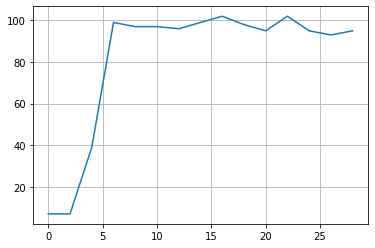

In [4]:
# popsize - множитель, устанавливающий общую численность популяции 
print('Параметр popsize = 100: \n', differential_evolution(ackley, bounds, popsize = 100, seed=42), '\n') 
print('Параметр popsize = 10: \n', differential_evolution(ackley, bounds, popsize = 10, seed=42), '\n') 

# формируем график:

po = {}
for i in range(0, 30, 2):
    tmp = differential_evolution(ackley, bounds, popsize=i, seed=42)
    po[i] = tmp.nit
        
plt.plot(list(po.keys()), list(po.values()))
plt.grid()
plt.show()

In [ ]:
# tol- Относительная толерантность к сходимости, решение прекращается, 
# когда np.std(pop) <= atol + tol * np.abs(np.mean(population_energies)), 
#где atol и tol-абсолютная и относительная толерантности соответственно

# В переоде: когда среднее значение энергий совокупности, умноженное на tol, деленное на стандартное отклонение энергий совокупности, 
# больше 1, процесс решения завершается: convergence = mean(pop) * tol / stdev(pop) > 1

print('Параметр tol = 0.5: \n', differential_evolution(ackley, bounds, tol=0.5 , seed=42), '\n') 
print('Параметр tol = 0.1: \n', differential_evolution(ackley, bounds, tol=0.1, seed=42), '\n') 
print('Параметр tol = 0.2: \n', differential_evolution(ackley, bounds, tol=0.2, seed=42), '\n') 

# формируем график:
tols = np.linspace(0.1, 0.5, 15)
mu = {}
for i in tols:
    tmp = differential_evolution(ackley, bounds, seed=42, tol=i)
    mu[i] = tmp.nit
        
plt.plot(list(mu.keys()), list(mu.values()))
plt.grid()
plt.show()

In [ ]:
# mutation:
# Константа мутации. В литературе это также известно как дифференциальный вес, обозначаемый буквой F. 
# Если указан как число с плавающей запятой, он должен находиться в диапазоне [0, 2]. 
# Если указано как кортеж (min, max), используется колебание. 
# Колебание случайным образом изменяет константу мутации от поколения к поколению. 
# Константа мутации для этого поколения взята из U[min, max). Колебание может значительно ускорить сходимость. 
# Увеличение константы мутации увеличивает радиус поиска, но замедляет сходимость.(min, max)U[min, max)
ret_1 = differential_evolution(ackley, bounds, mutation=1.0 , seed=42)
ret_2 = differential_evolution(ackley, bounds, mutation=1.5, seed=42)
ret_3 = differential_evolution(ackley, bounds, mutation=1.9, seed=42)
print('Параметр mutation = 1.0: \n', ret_1, '\n')  
print('Параметр mutation = 1.5: \n', ret_2, '\n') 
print('Параметр mutation = 1.9: \n', ret_3, '\n') 

# формируем график:
mutations = np.linspace(1.0, 1.5, 25)
mu = {}
for i in mutations:
    tmp = differential_evolution(ackley, bounds, seed=42, mutation=i)
    mu[i] = tmp.nit
        
plt.plot(list(mu.keys()), list(mu.values()))
plt.grid()
plt.show()

In [ ]:
# recombination:
# Константа рекомбинации должна быть в диапазоне [0, 1]. 
# В литературе это также известно как вероятность кроссовера 
# и обозначается CR. Увеличение этого значения 
# позволяет большему количеству мутантов перейти 
# в следующее поколение, но с риском стабильности популяции
print('Параметр recombination = 0.3: \n', differential_evolution(ackley, bounds, recombination=0.3, seed=42), '\n')
print('Параметр recombination = 0.6: \n', differential_evolution(ackley, bounds, recombination=0.6, seed=42), '\n')
print('Параметр recombination = 0.97: \n', differential_evolution(ackley, bounds, recombination=0.97, seed=42), '\n')

In [ ]:
# updating: {'немедленное', 'отложенное'}
# Если 'immediate', вектор наилучшего решения постоянно обновляется в пределах одного поколения [4] . 
# Это может привести к более быстрой сходимости, поскольку пробные векторы могут использовать 
# преимущества непрерывных улучшений в лучшем решении. При наличии 'deferred'вектор наилучшего решения 
# обновляется один раз за поколение. 
# Только "deferred" совместим с распараллеливанием, и ключевое слово workers может переопределить этот параметр.
# polish - "полировка" лучшего члена популяции в конце
ret1 = differential_evolution(ackley, bounds, updating='immediate', seed=42)
ret2 = differential_evolution(ackley, bounds, updating='deferred', seed=42)
print('Параметр updating = "immediate": \n', ret1, '\n')
print('Параметр updating = "deferred": \n', ret2, '\n')
print('Параметр updating = "deferred" + параметр polish=False: \n', differential_evolution(ackley, bounds, updating='deferred', polish=False, seed=42), '\n')


